#**Hashing vectorizer in nlp**(assign a numeric)

#**CountVectorizer vs. HashingVectorizer**

* HashingVectorizer and CountVectorizer are meant to do the same thing. Which is to convert a collection of text documents to a matrix of token occurrences.

* **The difference is that HashingVectorizer does not store the resulting vocabulary (i.e. the unique tokens).**

* With HashingVectorizer, each token directly maps to a column position in a matrix, where its size is pre-defined.For example, if you have 10,000 columns in your matrix, each token maps to 1 of the 10,000 columns. This mapping happens via hashing.

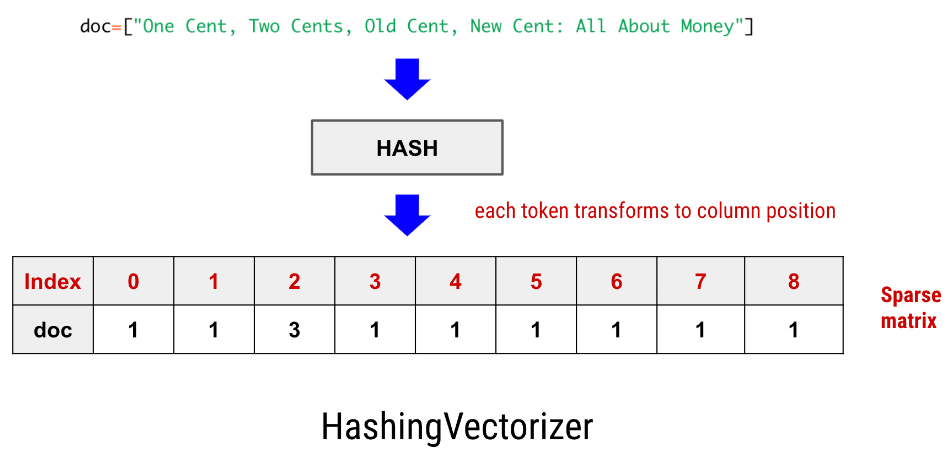

* The benefit of not storing the vocabulary (dictionary of tokens) is two folded. First, this is very efficient for a large dataset.

* Holding a 300M token vocabulary in memory could be a challenge in certain computing environments as these are essentially strings. It demands  more memory compared to their integer counterparts.

* By not having to store the vocabulary, the resulting HashingVectorizer object when saved, would be much smaller and thus faster to load back into memory when needed.

#**Downside**

* The downside of doing this is that it will not be possible to retrieve the actual token given the column position. This would be especially important in tasks like **keyword extraction,** where you want to retrieve and use the actual tokens.

#**Here we are using 5 cat in the hat book titles**

In [1]:
from sklearn.feature_extraction.text import HashingVectorizer

# dataset
cat_in_the_hat_docs=[
      "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
      "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
      "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
      "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
      "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
]

In [7]:
#from sklearn.feature_extraction.text import HashingVectorizer
#data=["Holding a 300M token vocabulary in memory could be a challenge in certain computing environments as these are essentially strings. It demands  more memory compared to their integer counterparts.By not having to store the vocabulary, the resulting HashingVectorizer object when saved, would be much smaller and thus faster to load back into memory when needed.The downside of doing this is that it will not be possible to retrieve the actual token given the column position. This would be especially important in tasks like keyword extraction, where you want to retrieve and use the actual tokens.Now let’s look at how to use HashingVectorizer to generate raw term counts"]

#**Generate Raw Term Counts**

* Now, we will use HashingVectorizer to compute token counts using our toy dataset.

In [2]:
# Compute raw counts using hashing vectorizer 
# Small numbers of n_features can cause hash collisions(a crash) 

hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False) 

# compute counts without any term frequency normalization 
X = hvectorizer.fit_transform(cat_in_the_hat_docs)

In [3]:
X

<5x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 75 stored elements in Compressed Sparse Row format>

* Notice that the matrix size has to be pre-specified. Also, if your vocabulary is huge and your matrix size is small, then you are going to end up with **hash collision.** Meaning, two different tokens (e.g. `coffee` and `caffe`) could map to the same column position, distorting your counts. So you want to be careful during initialization. We are also turning off normalization with norm=None.

In [6]:
X.shape

(5, 10000)

* 5 documents, and a 10,000 column matrix. In this example, most of the columns would be empty as the toy dataset is really small.*

In [10]:
#Let’s print the columns that are populated for the first document
# print populated columns of first document
# format: (doc id, pos_in_matrix)  raw_count
print(X[0])

  (0, 568)	1.0
  (0, 689)	3.0
  (0, 797)	1.0
  (0, 1079)	1.0
  (0, 1582)	2.0
  (0, 1676)	1.0
  (0, 1690)	1.0
  (0, 1715)	1.0
  (0, 1817)	1.0
  (0, 1918)	2.0
  (0, 2005)	1.0
  (0, 2159)	2.0
  (0, 2532)	1.0
  (0, 2845)	2.0
  (0, 2938)	1.0
  (0, 3032)	2.0
  (0, 3039)	1.0
  (0, 3227)	2.0
  (0, 3822)	1.0
  (0, 3926)	1.0
  (0, 3974)	1.0
  (0, 4061)	1.0
  (0, 4134)	1.0
  (0, 4148)	1.0
  (0, 4151)	1.0
  :	:
  (0, 7895)	1.0
  (0, 7906)	1.0
  (0, 8320)	1.0
  (0, 8474)	1.0
  (0, 8519)	1.0
  (0, 8769)	1.0
  (0, 8779)	1.0
  (0, 8827)	1.0
  (0, 8855)	1.0
  (0, 8958)	6.0
  (0, 9139)	1.0
  (0, 9151)	1.0
  (0, 9212)	1.0
  (0, 9263)	1.0
  (0, 9277)	1.0
  (0, 9329)	3.0
  (0, 9422)	1.0
  (0, 9434)	1.0
  (0, 9605)	1.0
  (0, 9788)	1.0
  (0, 9807)	1.0
  (0, 9899)	1.0
  (0, 9929)	1.0
  (0, 9979)	1.0
  (0, 9988)	2.0


* 15 unique tokens, one with a count of 3 and the rest all 1. Notice that the position ranges from 0 to 9999. All other arguments that you use with CountVectorizer such as stop words, n_grams size and etc. would also apply here.

#**Same Results With CountVectorizer**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cvectorizer = CountVectorizer()

# compute counts without any term frequency normalization
X = cvectorizer.fit_transform(cat_in_the_hat_docs)

In [12]:
X

<5x43 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in Compressed Sparse Row format>

In [14]:
X.shape

(5, 43)

* Notice that instead of (5,10000) as in the HashingVectorizer example, you see (5,43). **This is because we did not force a matrix size with CountVectorizer. The matrix size is based on how many unique tokens were found in your vocabulary, where in this case it is 43.**

In [ ]:
#Now if we print the counts for the first document, this is what we would see:
# print populated columns of first document
# format: (doc id, pos_in_matrix)  raw_count
print(X[0])

* This is similar to the HashingVectorizer example, we have 15 populated columns. But, the column position ranges from (0,42)

#**When to use HashingVectorizer?**

* **If you are using a large dataset for your machine learning tasks and you have no use for the resulting dictionary of tokens, then HashingVectorizer would be a good candidate.**

* **However, if you worry about hash collisions (which is bound to happen if the size of your matrix is too small), then  you might want to stick to CountVectorizer until you feel that you have maxed out your computing resources and it’s time to optimize. Also, if you need access to the actual tokens, then again CountVectorizer is the more appropriate choice.**

#**Problem Statment**

#**What is pro and cons while using the Frequency based embedding and how to select the embedding, which one is better for which task?(such as like TI-IDF,Bga of words,N-grams,Counter vectorizers and Hashing vectorizers)** 

Frequency-based embeddings are word embeddings that are based on the frequency of a word in a corpus. The most common frequency-based embedding method is Count-Based Embeddings such as Bag-of-Words, Term Frequency-Inverse Document Frequency (TF-IDF), and Latent Semantic Analysis (LSA). Here are some pros and cons of using frequency-based embeddings:

Pros:

1. **Simple and easy to use:** Frequency-based embeddings are easy to understand and implement compared to other more complex embedding methods such as neural-based embeddings.

2. **Captures global context:** Frequency-based embeddings are able to capture the global context of a corpus, making them useful for tasks that require a broad understanding of a language such as text classification or topic modeling.

3. **Good for rare words:** Frequency-based embeddings work well for rare words that may not have enough examples for other methods to learn a good representation.

Cons:

1. **Lack of semantic meaning:**(how words relate to other words or **Semantic analysis analyzes** the grammatical format of sentences, including the arrangement of words, phrases, and clauses, to determine relationships between independent terms in a specific context.) Frequency-based embeddings do not capture semantic meaning very well. Words that are similar in meaning may not be close in the embedding space, making them less useful for tasks such as word similarity or analogies.

2. **Unable to handle out-of-vocabulary words:** Frequency-based embeddings are unable to handle out-of-vocabulary words that do not appear in the training corpus, making them less useful for tasks where new words are likely to appear.

3. **Limited to the corpus used for training:** Frequency-based embeddings are limited by the corpus used for training, making them less generalizable to other corpora or languages. 

4. **They are sensitive to noise and outliers in the data, which can affect their performance.**

5. **They can suffer from the problem of sparsity, where many features have zero values, which can lead to overfitting or underfitting of the model.**

6. **They do not account for the order of words, which can lead to a loss of important contextual information.**

7. **They may not be suitable for some NLP tasks that require a deeper understanding of language, such as language translation or question answering.**

Overall, **frequency-based embeddings are useful for certain tasks but have limitations in their ability to capture semantic meaning and handle new words. Other methods such as neural-based embeddings have been developed to address these limitations.**

#**Frequency based embedding and how to select the embedding?**

Frequency-based embeddings methods can be effective in several NLP tasks such as text classification, sentiment analysis, and information retrieval. Here are some guidelines for choosing the most suitable method based on the NLP task:

1. **Text classification:** In this task, the goal is to assign a label or category to a piece of text. Bag of words, counter vectorization, and hashing vectorization can be effective methods for this task, especially when combined with machine learning algorithms like Naive Bayes, Support Vector Machines (SVMs), or logistic regression. These methods are good for capturing the most important terms in the document and their frequency.

2. **Sentiment analysis:** In this task, the goal is to determine the sentiment or opinion expressed in a piece of text. TF-IDF and co-occurrence matrix can be useful methods for this task, as they can help to identify important words or phrases that are indicative of positive or negative sentiment. Additionally, these methods can be used with machine learning algorithms like SVMs or neural networks to classify the sentiment of the text.

3. **Information retrieval:** In this task, the goal is to find relevant documents or passages in response to a user query. TF-IDF and co-occurrence matrix are commonly used methods for information retrieval, as they can help to identify the most relevant documents based on the frequency and importance of the query terms in the document corpus.

**When selecting a method for an NLP task, it is important to consider the type of data, the size of the dataset, and the specific requirements of the task. Additionally, it is often useful to experiment with different methods and compare their performance to select the most appropriate one.**


#**End of the Notes!**